Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=785c4cff92acc056494a27c63fe8ebc2998010d7bf6fa66c7f290344e4b5025c
  Stored in directory: /root/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
Successfully built minisom


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importing the dataset

In [ ]:
cwd = Path.cwd()
path = cwd / "datasets/SOM Credit Card"
dataset = pd.read_csv(os.path.join(path, 'Credit_Card_Applications.csv'))

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
sc.fit_transform(X)

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

Training the SOM

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15,
              sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

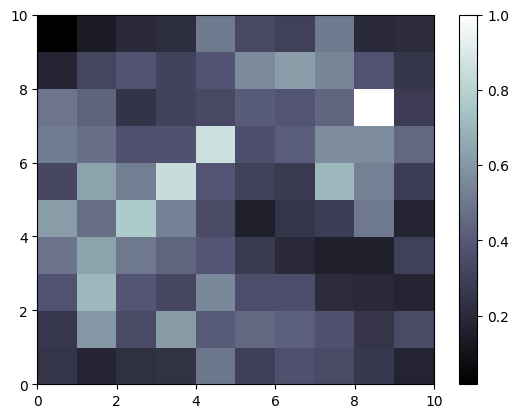

In [ ]:
# Visualize the results
from pylab import bone, pcolor, colorbar, plt, show
bone()
pcolor(som.distance_map().T)
colorbar()  # lengends of all the colors

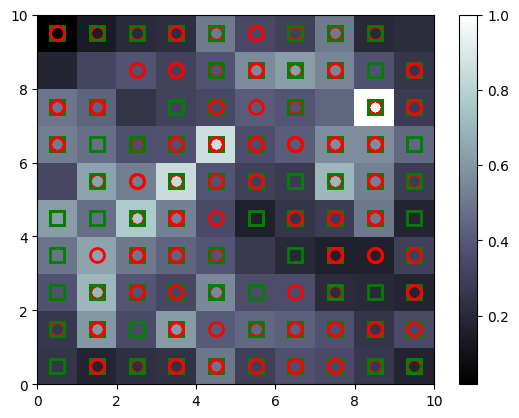

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar()  # lengends of all the colors

markers = ['o', 's']  # o - circles, s - squares
colors = ['r', 'g']  # r - red, g - green
# red circle - customer got approval
# green square - didn't get approval

for i, x in enumerate(X):
  w = som.winner(x)
  plt.plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2
       )  # on this winning node, plot the marker
show()

In [ ]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,7)],
                        mappings[(4,6)]),
                        axis=0)  # (8,7), (4,6) - coords of white square - customers who cheated
                        # axis=0, concatenating along the vertical axis
frauds = sc.inverse_transform(frauds)

# not all are cheaters - they are potential cheaters. The bank will
# revise their application + investigate to find if they cheated